<a href="https://colab.research.google.com/github/LeuroPrince/Literature-Reproduction-for-WenLab/blob/main/Replicating_figure_5C_%26_5F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
##这里的代码来自figure1C，相应的注释请前往figure1C查看
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_path1c = "/content/drive/My Drive/WenLab/Figure 1-source data for Figure 1C and supplement 1A-B.xlsx"
file_path5C = "/content/drive/My Drive/WenLab/Figure 5-source data for Figure 5C.xlsx"
df_fig1c = pd.read_excel(file_path1c, header = 2)
df_raw1c = pd.read_excel(file_path1c,sheet_name = "Pmec-4_ChR2",header = 2)
df_raw1c.head()
df_raw1c['duration of reversal(s)'].fillna(0, inplace=True)#将no response 对应的值改为0
###读取5C的数据
df_raw5C = pd.read_excel(file_path5C,header = 3)
df_raw5C['duration time (s)'].fillna(0, inplace=True)
df_raw5C.head()



Mounted at /content/drive


/tmp/ipython-input-1705812121.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_raw1c['duration of reversal(s)'].fillna(0, inplace=True)#将no response 对应的值改为0
/tmp/ipython-input-1705812121.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

,worm name,turn,duration time (s),date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,20190123 w1,1.0,7.540,20180809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,3.947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,5.767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,4.451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,5.404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df_raw5C.columns)

Index(['worm name', 'turn', 'duration time (s)', 'date', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')


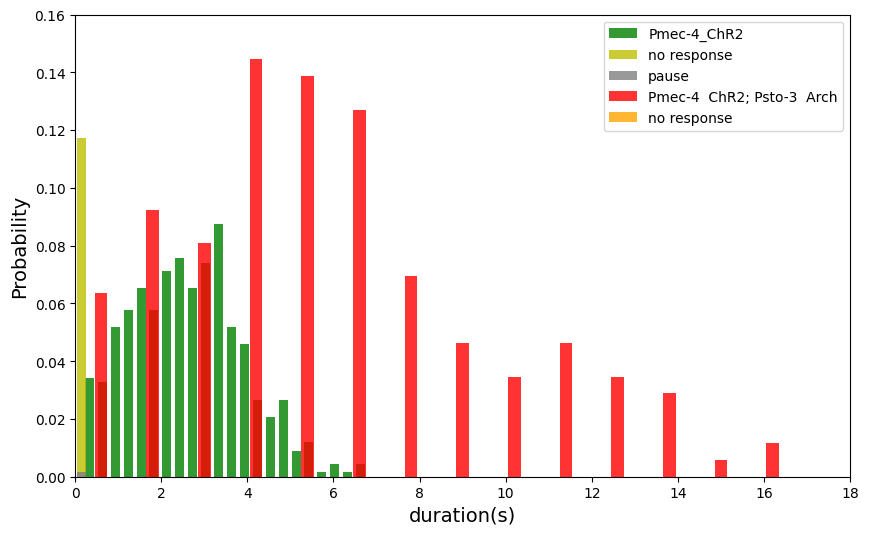

In [4]:

#我只关心有'reversal'，"no response"，"pause"的项的duration值，在此处将其选择出来
reversal = df_raw1c['duration of reversal(s)'].dropna()
#定义no response项
no_response_mask = (df_raw1c['turn?'].isna()) & (df_raw1c['note'] == 'no res')
no_response = df_raw1c[no_response_mask]['duration of reversal(s)']
#定义pause项
pause_mask = (df_raw1c['turn?'].isna()) & (df_raw1c['note'] != 'no res')
pause = df_raw1c[pause_mask]['duration of reversal(s)']

##模仿1C中的，我们来定义5C的相应值
  #定义response
reversal_5C_dropna = df_raw5C['duration time (s)'].dropna()
reversal_5C = reversal_5C_dropna[reversal_5C_dropna != 0]
  #定义no response
no_response_mask_5C = (df_raw5C['turn'].isna())
no_response_5C = df_raw5C[no_response_mask_5C]['duration time (s)']

#定义两个total number
total_num = len(df_raw1c)
total_num_5C = len(df_raw5C)



bins = np.arange(0,8.5,0.3)
bins_5C = np.arange(0,18,1.2)
plt.figure(figsize=(10,6))
my_alpha = 0.8
rwidth = 0.7
rwidth5C = 0.25
offset1 = 0.00
offset2 = 0.09
offset3 = 0.18

bins1 = bins + offset1
bins2 = bins + offset2
bins3 = bins + offset3
bins5C1 = bins_5C + offset3
###1c
# "reversal" 数据的权重
weights_reversal = np.ones_like(reversal) / total_num
#"no response"数据的权重
weights_no_response = np.ones_like(no_response) /total_num
#pause数据的权重
weights_pause = np.ones_like(pause) / total_num

###5C
# "reversal" 数据的权重
weights_reversal_5C = np.ones_like(reversal_5C) / total_num_5C
#"no response"数据的权重
weights_no_response_5C = np.ones_like(no_response_5C) / total_num_5C

plt.hist(reversal, bins=bins3, weights=weights_reversal,
         label='Pmec-4_ChR2',
         color='g',
         alpha=my_alpha,
         rwidth=rwidth)

plt.hist(no_response, bins=bins1, weights=weights_no_response,
         label='no response',
         color='y',
         alpha=my_alpha,
         rwidth=rwidth)

plt.hist(pause, bins=bins1, weights=weights_pause,
         label='pause',
         color='gray',
         alpha=my_alpha,
         rwidth=rwidth)

###绘制5C的图像
plt.hist(reversal_5C, bins=bins_5C, weights=weights_reversal_5C,
         label='Pmec-4  ChR2; Psto-3  Arch',
         color='r',
         alpha=my_alpha,
         rwidth=rwidth5C)

plt.hist(no_response_5C, bins=bins5C1, weights=weights_no_response_5C,
         label='no response',
         color='orange',
         alpha=my_alpha,
         rwidth=rwidth5C)

plt.xlabel('duration(s)',fontsize = 14)
plt.ylabel('Probability',fontsize = 14)
plt.legend()
plt.ylim(0,0.16)
plt.xlim(0,18)
plt.show()

In [5]:
#我只关心有"turn"的和无"turn"，"no response"，"pause"的项的duration值，在此处将其选择出来
reversal_with_turn = df_raw1c[df_raw1c['turn?']== 1]['duration of reversal(s)']
reversal_without_turn = df_raw1c[df_raw1c['turn?']== 0]['duration of reversal(s)']
#for 5C
reversal_with_turn5C = df_raw5C[df_raw5C['turn']== 1]['duration time (s)']
reversal_without_turn5C = df_raw5C[df_raw5C['turn']== 0]['duration time (s)']

 曲线拟合成功！
  r1 (sigmoid) 拟合参数 (k1,k2,k3): [0.0938 0.895  3.6737]
  r2 (erfi) 拟合参数 (k1,k2,k3,k4): [0.0054 0.012  2.     0.5397]

 5C 曲线拟合成功！ 
  r1 (sigmoid) 拟合参数 (k1,k2,k3): [0.0288 0.     5.    ]
  r2 (erfi) 拟合参数 (k1,k2,k3,k4): [1.0000e-04 2.1000e-03 1.9152e+00 4.3450e-01]


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/proportion.py:190: RuntimeWarning: invalid value encountered in divide
  q_ = count_a / nobs_a
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/proportion.py:282: RuntimeWarning: divide by zero encountered in divide
  denom = 1 + crit2 / nobs_a
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/proportion.py:283: RuntimeWarning: divide by zero encountered in divide
  center = (q_ + crit2 / (2 * nobs_a)) / denom
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/proportion.py:285: RuntimeWarning: divide by zero encountered in divide
  q_ * (1.0 - q_) / nobs_a + crit2 / (4.0 * nobs_a**2)


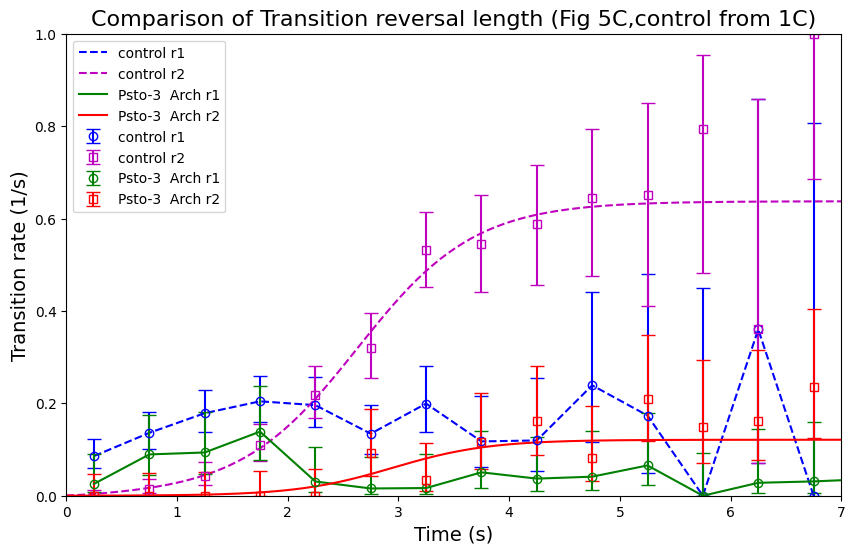

In [22]:
###定义并绘画出拟合函数,这里的代码与figure1C中的一样，更多注释可移步1C文件
from os import pipe2
from scipy.optimize import curve_fit
from scipy.special import erfi
from statsmodels.stats.proportion import proportion_confint
import warnings
##fig1c(right)
#定义bins
bin_width = 0.5  #Δt = 0.5
max_time = np.ceil(max(reversal_with_turn.max(),reversal_without_turn.max()))
bins = np.arange(0, max_time+ bin_width, bin_width)

bin_starts = bins[:-1]
bin_centers = bin_starts + (bin_width/2)

n_forward_i, _ = np.histogram(reversal_without_turn, bins=bins)
reversal_length_i, _ = np.histogram(reversal_with_turn, bins=bins)
total_reversals = pd.concat([reversal_with_turn, reversal_without_turn])

S_i_total = []
for t_start in bin_starts:
  hit = np.sum(total_reversals >= t_start)
  S_i_total.append(hit)

S_i_total = np.array(S_i_total)

p_r1 =np.divide(n_forward_i,S_i_total,
              out = np.zeros_like(n_forward_i,dtype = float),
              where=S_i_total!=0)
p_r2 =np.divide(reversal_length_i,S_i_total,
              out = np.zeros_like(reversal_length_i,dtype = float),
              where=S_i_total!=0)


##计算误差棒,定义概率的误差
err_forw_low_05, err_forw_high_05 = proportion_confint(n_forward_i, S_i_total, method='wilson')
err_turn_low_05, err_turn_high_05 = proportion_confint(reversal_length_i, S_i_total, method='wilson')
##定义拟合函数
def r1_func_fit(t,k1,k2,k3):
  return k1/(1+np.exp(-(t - k2))/k3)
##r2用erfi
def r2_func_fit(t,k1,k2,k3,k4):
  arg = k2+k3*np.exp(-t / k4)
  safe_arg = np.maximum(arg, 1e-9)##用来避免erfi(0)
  return k1 / erfi(safe_arg)
  ##拟合r1
k0_r1 = [0.3 ,3, 0.1]
bounds_r1 = ([0, 0, 0.1], [1.0, 10.0, 5.0])##定义上界，下界
xdata_r1 = bin_centers[:11]
ydata_r1 = p_r1[:11]
popt_r1, _ = curve_fit(r1_func_fit, xdata_r1, ydata_r1,
                       p0=k0_r1, bounds=bounds_r1, maxfev=5000)
  ##拟合r2
k0_r2 = [0.0233, 0.1746, 0.7092, 0.2889]##来自matlab代码中的初始猜测值
bounds_r2 = ([0, 0, 0, 0.1], [1.0, 2.0, 2.0, 2.0]) # (下界), (上界)
xdata_r2 = bin_centers[:10]
ydata_r2 = p_r2[:10]
popt_r2, _ = curve_fit(r2_func_fit, xdata_r2, ydata_r2,
                     p0=k0_r2, bounds=bounds_r2, maxfev=5000)
print(" 曲线拟合成功！")
print(f"  r1 (sigmoid) 拟合参数 (k1,k2,k3): {np.round(popt_r1, 4)}")
print(f"  r2 (erfi) 拟合参数 (k1,k2,k3,k4): {np.round(popt_r2, 4)}")

##定义一个转换函数
def convert_p05_to_p1(p):
  return 2*p - p**2
y_plot_r1_data = convert_p05_to_p1(p_r1)
y_plot_r2_data = convert_p05_to_p1(p_r2)
##转换误差棒
ci_forw_low_1s = convert_p05_to_p1(err_forw_low_05)
ci_forw_high_1s = convert_p05_to_p1(err_forw_high_05)
ci_turn_low_1s = convert_p05_to_p1(err_turn_low_05)
ci_turn_high_1s = convert_p05_to_p1(err_turn_high_05)
y_err_r1_low = np.abs(y_plot_r1_data - ci_forw_low_1s)
y_err_r1_high = np.abs(ci_forw_high_1s - y_plot_r1_data)
y_err_r2_low =np.abs(y_plot_r2_data - ci_turn_low_1s)
y_err_r2_high = np.abs(ci_turn_high_1s - y_plot_r2_data)
##转换拟合曲线
t_smooth = np.linspace(0,7,200)
##计算拟合曲线
fit_r1_p05s = r1_func_fit(t_smooth, *popt_r1)
fit_r2_p05s = r2_func_fit(t_smooth, *popt_r2)
##将计算出的拟合曲线进行转化
y_fit_r1_p1s = convert_p05_to_p1(fit_r1_p05s)
y_fit_r2_p1s = convert_p05_to_p1(fit_r2_p05s)




########绘制5C的拟合曲线########
## fig5C(right)
#定义bins
bin_width_5C = 0.5  #Δt = 0.5 (保持一致)
max_time_5C = np.ceil(max(reversal_with_turn5C.max(),reversal_without_turn5C.max()))
bins_5C = np.arange(0, max_time_5C + bin_width_5C, bin_width_5C)

bin_starts_5C = bins_5C[:-1]
bin_centers_5C = bin_starts_5C + (bin_width_5C/2)

#定义分子与分母的各项
  #用histogram命令选取每个bin中完成的reversal的个数
n_forward_i_5C, _ = np.histogram(reversal_without_turn5C, bins=bins_5C)
reversal_length_i_5C, _ = np.histogram(reversal_with_turn5C, bins=bins_5C)
  #获得所有reversal的实验次数作为分母
total_reversals_5C = pd.concat([reversal_with_turn5C, reversal_without_turn5C])

  #定义S_i
S_i_total_5C = []
for t_start in bin_starts_5C:
  hit_5C = np.sum(total_reversals_5C >= t_start)
  S_i_total_5C.append(hit_5C)

S_i_total_5C = np.array(S_i_total_5C)

##计算转换率r1和r2
p_r1_5C =np.divide(n_forward_i_5C, S_i_total_5C,
              out = np.zeros_like(n_forward_i_5C,dtype = float),
              where=S_i_total_5C!=0)
p_r2_5C =np.divide(reversal_length_i_5C, S_i_total_5C,
              out = np.zeros_like(reversal_length_i_5C,dtype = float),
              where=S_i_total_5C!=0)

##计算误差棒,定义概率的误差
err_forw_low_05_5C, err_forw_high_05_5C = proportion_confint(n_forward_i_5C, S_i_total_5C, method='wilson')
err_turn_low_05_5C, err_turn_high_05_5C = proportion_confint(reversal_length_i_5C, S_i_total_5C, method='wilson')

## 拟合函数 (r1_func_fit, r2_func_fit) 已在 1C 部分定义

##拟合曲线 r1 (5C)
k0_r1_5C = [0.3 ,3, 0.1] # 使用 1C 的初始猜测值
bounds_r1_5C = ([0, 0, 0.1], [1.0, 10.0, 5.0]) # 使用 1C 的界限
# 为了防止 5C 的数据点比 1C 少而导致切片越界，我们动态选择切片
num_bins_r1_5C = min(11, len(bin_centers_5C))
xdata_r1_5C = bin_centers_5C[:num_bins_r1_5C]
ydata_r1_5C = p_r1_5C[:num_bins_r1_5C]
# 警告：如果 5C 数据分布差异太大，拟合可能会失败。
try:
    popt_r1_5C, _ = curve_fit(r1_func_fit, xdata_r1_5C, ydata_r1_5C,
                           p0=k0_r1_5C, bounds=bounds_r1_5C, maxfev=5000)
except RuntimeError as e:
    print(f"警告: 5C r1 拟合失败: {e}")
    popt_r1_5C = k0_r1_5C # 失败时使用初始值

##拟合曲线 r2 (5C)
k0_r2_5C = [0.0233, 0.1746, 0.7092, 0.2889] # 使用 1C 的初始猜测值
bounds_r2_5C = ([0, 0, 0, 0.1], [1.0, 2.0, 2.0, 2.0]) # 使用 1C 的界限
num_bins_r2_5C = min(10, len(bin_centers_5C))
xdata_r2_5C = bin_centers_5C[:num_bins_r2_5C]
ydata_r2_5C = p_r2_5C[:num_bins_r2_5C]
try:
    popt_r2_5C, _ = curve_fit(r2_func_fit, xdata_r2_5C, ydata_r2_5C,
                         p0=k0_r2_5C, bounds=bounds_r2_5C, maxfev=5000)
except RuntimeError as e:
    print(f"警告: 5C r2 拟合失败: {e}")
    popt_r2_5C = k0_r2_5C # 失败时使用初始值

print("\n 5C 曲线拟合成功！ ")
print(f"  r1 (sigmoid) 拟合参数 (k1,k2,k3): {np.round(popt_r1_5C, 4)}")
print(f"  r2 (erfi) 拟合参数 (k1,k2,k3,k4): {np.round(popt_r2_5C, 4)}")


## 转换函数 (convert_p05_to_p1) 已在 1C 部分定义

##转换数据 (5C)
y_plot_r1_data_5C = convert_p05_to_p1(p_r1_5C)
y_plot_r2_data_5C = convert_p05_to_p1(p_r2_5C)
##转换误差棒 (5C)
ci_forw_low_1s_5C = convert_p05_to_p1(err_forw_low_05_5C)
ci_forw_high_1s_5C = convert_p05_to_p1(err_forw_high_05_5C)
ci_turn_low_1s_5C = convert_p05_to_p1(err_turn_low_05_5C)
ci_turn_high_1s_5C = convert_p05_to_p1(err_turn_high_05_5C)
y_err_r1_low_5C = np.abs(y_plot_r1_data_5C - ci_forw_low_1s_5C)
y_err_r1_high_5C = np.abs(ci_forw_high_1s_5C - y_plot_r1_data_5C)
y_err_r2_low_5C =np.abs(y_plot_r2_data_5C - ci_turn_low_1s_5C)
y_err_r2_high_5C = np.abs(ci_turn_high_1s_5C - y_plot_r2_data_5C)
##转换拟合曲线 (5C)
t_smooth_5C = np.linspace(0,7,200) # 和 1C 保持一致
##计算拟合曲线
fit_r1_p05s_5C = r1_func_fit(t_smooth_5C, *popt_r1_5C)
fit_r2_p05s_5C = r2_func_fit(t_smooth_5C, *popt_r2_5C)
##将计算出的拟合曲线进行转化
y_fit_r1_p1s_5C = convert_p05_to_p1(fit_r1_p05s_5C)
y_fit_r2_p1s_5C = convert_p05_to_p1(fit_r2_p05s_5C)



###### 3. 绘图 (合并 1C 和 5C)


plt.figure(figsize=(10, 6)) # 稍微调大画布以便容纳两个图例

#  绘制 1C
  # 绘制 r1 (1C, no turn)
plt.errorbar(bin_centers, y_plot_r1_data, yerr=[y_err_r1_low, y_err_r1_high],
             fmt='bo', label='control r1',
             markerfacecolor='none', capsize=5)
  # 绘制 r2 (1C, with turn)
plt.errorbar(bin_centers, y_plot_r2_data, yerr=[y_err_r2_low, y_err_r2_high],
             fmt='ms', label='control r2',
             markerfacecolor='none', capsize=5)
# 绘制 1C 拟合曲线
plt.plot(bin_centers, y_plot_r1_data, 'b--', label='control r1') ##虚线
plt.plot(t_smooth, y_fit_r2_p1s, 'm--', label='control r2')   #虚线


#  绘制 5C
  # 绘制 r1 (5C, no turn)
plt.errorbar(bin_centers_5C, y_plot_r1_data_5C, yerr=[y_err_r1_low_5C, y_err_r1_high_5C],
             fmt='go', label='Psto-3  Arch r1',
             markerfacecolor='none', capsize=5)
  # 绘制 r2 (5C, with turn)
plt.errorbar(bin_centers_5C, y_plot_r2_data_5C, yerr=[y_err_r2_low_5C, y_err_r2_high_5C],
             fmt='rs', label='Psto-3  Arch r2',
             markerfacecolor='none', capsize=5)
  # 绘制 5C 拟合曲线
plt.plot(bin_centers_5C, y_plot_r1_data_5C, 'g-', label='Psto-3  Arch r1') # 绿色实线
plt.plot(t_smooth_5C, y_fit_r2_p1s_5C, 'r-', label='Psto-3  Arch r2') # 红色实线


#  美化图表
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Transition rate (1/s)', fontsize=14)
plt.title('Comparison of Transition reversal length (Fig 5C,control from 1C)', fontsize=16)
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 1.0)
plt.xlim(0, 7) # 保持 X 轴范围一致
plt.grid(False) # 关闭网格

plt.show()


 曲线拟合成功！
  r1 (sigmoid) 拟合参数 (k1,k2,k3): [0.0938 0.895  3.6737]
  r2 (erfi) 拟合参数 (k1,k2,k3,k4): [0.0054 0.012  2.     0.5397]

 5C 曲线拟合成功！ 
  r1 (sigmoid) 拟合参数 (k1,k2,k3): [0.0288 0.     5.    ]
  r2 (erfi) 拟合参数 (k1,k2,k3,k4): [1.0000e-04 2.1000e-03 1.9152e+00 4.3450e-01]


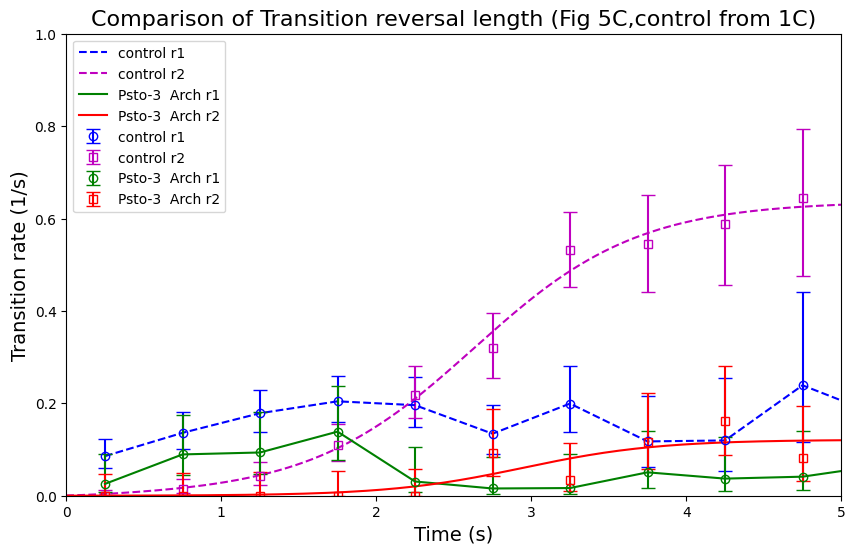

In [25]:
###奇怪的是，当我们选取x的范围为5时，画出来的图像与论文上的一致（除了坐标范围不同）也许时matlab和python具体计算方式的不同。
from os import pipe2
from scipy.optimize import curve_fit
from scipy.special import erfi
from statsmodels.stats.proportion import proportion_confint
import warnings
##fig1c(right)
#定义bins
bin_width = 0.5  #Δt = 0.5
max_time = np.ceil(max(reversal_with_turn.max(),reversal_without_turn.max()))
bins = np.arange(0, max_time+ bin_width, bin_width)

bin_starts = bins[:-1]
bin_centers = bin_starts + (bin_width/2)

n_forward_i, _ = np.histogram(reversal_without_turn, bins=bins)
reversal_length_i, _ = np.histogram(reversal_with_turn, bins=bins)
total_reversals = pd.concat([reversal_with_turn, reversal_without_turn])

S_i_total = []
for t_start in bin_starts:
  hit = np.sum(total_reversals >= t_start)
  S_i_total.append(hit)

S_i_total = np.array(S_i_total)

p_r1 =np.divide(n_forward_i,S_i_total,
              out = np.zeros_like(n_forward_i,dtype = float),
              where=S_i_total!=0)
p_r2 =np.divide(reversal_length_i,S_i_total,
              out = np.zeros_like(reversal_length_i,dtype = float),
              where=S_i_total!=0)


##计算误差棒,定义概率的误差
err_forw_low_05, err_forw_high_05 = proportion_confint(n_forward_i, S_i_total, method='wilson')
err_turn_low_05, err_turn_high_05 = proportion_confint(reversal_length_i, S_i_total, method='wilson')
##定义拟合函数
def r1_func_fit(t,k1,k2,k3):
  return k1/(1+np.exp(-(t - k2))/k3)
##r2用erfi
def r2_func_fit(t,k1,k2,k3,k4):
  arg = k2+k3*np.exp(-t / k4)
  safe_arg = np.maximum(arg, 1e-9)##用来避免erfi(0)
  return k1 / erfi(safe_arg)
  ##拟合r1
k0_r1 = [0.3 ,3, 0.1]
bounds_r1 = ([0, 0, 0.1], [1.0, 10.0, 5.0])##定义上界，下界
xdata_r1 = bin_centers[:11]
ydata_r1 = p_r1[:11]
popt_r1, _ = curve_fit(r1_func_fit, xdata_r1, ydata_r1,
                       p0=k0_r1, bounds=bounds_r1, maxfev=5000)
  ##拟合r2
k0_r2 = [0.0233, 0.1746, 0.7092, 0.2889]##来自matlab代码中的初始猜测值
bounds_r2 = ([0, 0, 0, 0.1], [1.0, 2.0, 2.0, 2.0]) # (下界), (上界)
xdata_r2 = bin_centers[:10]
ydata_r2 = p_r2[:10]
popt_r2, _ = curve_fit(r2_func_fit, xdata_r2, ydata_r2,
                     p0=k0_r2, bounds=bounds_r2, maxfev=5000)
print(" 曲线拟合成功！")
print(f"  r1 (sigmoid) 拟合参数 (k1,k2,k3): {np.round(popt_r1, 4)}")
print(f"  r2 (erfi) 拟合参数 (k1,k2,k3,k4): {np.round(popt_r2, 4)}")

##定义一个转换函数
def convert_p05_to_p1(p):
  return 2*p - p**2
y_plot_r1_data = convert_p05_to_p1(p_r1)
y_plot_r2_data = convert_p05_to_p1(p_r2)
##转换误差棒
ci_forw_low_1s = convert_p05_to_p1(err_forw_low_05)
ci_forw_high_1s = convert_p05_to_p1(err_forw_high_05)
ci_turn_low_1s = convert_p05_to_p1(err_turn_low_05)
ci_turn_high_1s = convert_p05_to_p1(err_turn_high_05)
y_err_r1_low = np.abs(y_plot_r1_data - ci_forw_low_1s)
y_err_r1_high = np.abs(ci_forw_high_1s - y_plot_r1_data)
y_err_r2_low =np.abs(y_plot_r2_data - ci_turn_low_1s)
y_err_r2_high = np.abs(ci_turn_high_1s - y_plot_r2_data)
##转换拟合曲线
t_smooth = np.linspace(0,5,200)
##计算拟合曲线
fit_r1_p05s = r1_func_fit(t_smooth, *popt_r1)
fit_r2_p05s = r2_func_fit(t_smooth, *popt_r2)
##将计算出的拟合曲线进行转化
y_fit_r1_p1s = convert_p05_to_p1(fit_r1_p05s)
y_fit_r2_p1s = convert_p05_to_p1(fit_r2_p05s)




########绘制5C的拟合曲线########
## fig5C(right)
#定义bins
bin_width_5C = 0.5  #Δt = 0.5 (保持一致)
max_time_5C = np.ceil(max(reversal_with_turn5C.max(),reversal_without_turn5C.max()))
bins_5C = np.arange(0, max_time_5C + bin_width_5C, bin_width_5C)

bin_starts_5C = bins_5C[:-1]
bin_centers_5C = bin_starts_5C + (bin_width_5C/2)

#定义分子与分母的各项
  #用histogram命令选取每个bin中完成的reversal的个数
n_forward_i_5C, _ = np.histogram(reversal_without_turn5C, bins=bins_5C)
reversal_length_i_5C, _ = np.histogram(reversal_with_turn5C, bins=bins_5C)
  #获得所有reversal的实验次数作为分母
total_reversals_5C = pd.concat([reversal_with_turn5C, reversal_without_turn5C])

  #定义S_i
S_i_total_5C = []
for t_start in bin_starts_5C:
  hit_5C = np.sum(total_reversals_5C >= t_start)
  S_i_total_5C.append(hit_5C)

S_i_total_5C = np.array(S_i_total_5C)

##计算转换率r1和r2
p_r1_5C =np.divide(n_forward_i_5C, S_i_total_5C,
              out = np.zeros_like(n_forward_i_5C,dtype = float),
              where=S_i_total_5C!=0)
p_r2_5C =np.divide(reversal_length_i_5C, S_i_total_5C,
              out = np.zeros_like(reversal_length_i_5C,dtype = float),
              where=S_i_total_5C!=0)

##计算误差棒,定义概率的误差
err_forw_low_05_5C, err_forw_high_05_5C = proportion_confint(n_forward_i_5C, S_i_total_5C, method='wilson')
err_turn_low_05_5C, err_turn_high_05_5C = proportion_confint(reversal_length_i_5C, S_i_total_5C, method='wilson')

## 拟合函数 (r1_func_fit, r2_func_fit) 已在 1C 部分定义

##拟合曲线 r1 (5C)
k0_r1_5C = [0.3 ,3, 0.1] # 使用 1C 的初始猜测值
bounds_r1_5C = ([0, 0, 0.1], [1.0, 10.0, 5.0]) # 使用 1C 的界限
# 为了防止 5C 的数据点比 1C 少而导致切片越界，我们动态选择切片
num_bins_r1_5C = min(11, len(bin_centers_5C))
xdata_r1_5C = bin_centers_5C[:num_bins_r1_5C]
ydata_r1_5C = p_r1_5C[:num_bins_r1_5C]
# 警告：如果 5C 数据分布差异太大，拟合可能会失败。
try:
    popt_r1_5C, _ = curve_fit(r1_func_fit, xdata_r1_5C, ydata_r1_5C,
                           p0=k0_r1_5C, bounds=bounds_r1_5C, maxfev=5000)
except RuntimeError as e:
    print(f"警告: 5C r1 拟合失败: {e}")
    popt_r1_5C = k0_r1_5C # 失败时使用初始值

##拟合曲线 r2 (5C)
k0_r2_5C = [0.0233, 0.1746, 0.7092, 0.2889] # 使用 1C 的初始猜测值
bounds_r2_5C = ([0, 0, 0, 0.1], [1.0, 2.0, 2.0, 2.0]) # 使用 1C 的界限
num_bins_r2_5C = min(10, len(bin_centers_5C))
xdata_r2_5C = bin_centers_5C[:num_bins_r2_5C]
ydata_r2_5C = p_r2_5C[:num_bins_r2_5C]
try:
    popt_r2_5C, _ = curve_fit(r2_func_fit, xdata_r2_5C, ydata_r2_5C,
                         p0=k0_r2_5C, bounds=bounds_r2_5C, maxfev=5000)
except RuntimeError as e:
    print(f"警告: 5C r2 拟合失败: {e}")
    popt_r2_5C = k0_r2_5C # 失败时使用初始值

print("\n 5C 曲线拟合成功！ ")
print(f"  r1 (sigmoid) 拟合参数 (k1,k2,k3): {np.round(popt_r1_5C, 4)}")
print(f"  r2 (erfi) 拟合参数 (k1,k2,k3,k4): {np.round(popt_r2_5C, 4)}")


## 转换函数 (convert_p05_to_p1) 已在 1C 部分定义

##转换数据 (5C)
y_plot_r1_data_5C = convert_p05_to_p1(p_r1_5C)
y_plot_r2_data_5C = convert_p05_to_p1(p_r2_5C)
##转换误差棒 (5C)
ci_forw_low_1s_5C = convert_p05_to_p1(err_forw_low_05_5C)
ci_forw_high_1s_5C = convert_p05_to_p1(err_forw_high_05_5C)
ci_turn_low_1s_5C = convert_p05_to_p1(err_turn_low_05_5C)
ci_turn_high_1s_5C = convert_p05_to_p1(err_turn_high_05_5C)
y_err_r1_low_5C = np.abs(y_plot_r1_data_5C - ci_forw_low_1s_5C)
y_err_r1_high_5C = np.abs(ci_forw_high_1s_5C - y_plot_r1_data_5C)
y_err_r2_low_5C =np.abs(y_plot_r2_data_5C - ci_turn_low_1s_5C)
y_err_r2_high_5C = np.abs(ci_turn_high_1s_5C - y_plot_r2_data_5C)
##转换拟合曲线 (5C)
t_smooth_5C = np.linspace(0,5,200) # 和 1C 保持一致
##计算拟合曲线
fit_r1_p05s_5C = r1_func_fit(t_smooth_5C, *popt_r1_5C)
fit_r2_p05s_5C = r2_func_fit(t_smooth_5C, *popt_r2_5C)
##将计算出的拟合曲线进行转化
y_fit_r1_p1s_5C = convert_p05_to_p1(fit_r1_p05s_5C)
y_fit_r2_p1s_5C = convert_p05_to_p1(fit_r2_p05s_5C)



###### 3. 绘图 (合并 1C 和 5C)


plt.figure(figsize=(10, 6)) # 稍微调大画布以便容纳两个图例

#  绘制 1C
  # 绘制 r1 (1C, no turn)
plt.errorbar(bin_centers, y_plot_r1_data, yerr=[y_err_r1_low, y_err_r1_high],
             fmt='bo', label='control r1',
             markerfacecolor='none', capsize=5)
  # 绘制 r2 (1C, with turn)
plt.errorbar(bin_centers, y_plot_r2_data, yerr=[y_err_r2_low, y_err_r2_high],
             fmt='ms', label='control r2',
             markerfacecolor='none', capsize=5)
# 绘制 1C 拟合曲线
plt.plot(bin_centers, y_plot_r1_data, 'b--', label='control r1') ##虚线
plt.plot(t_smooth, y_fit_r2_p1s, 'm--', label='control r2')   #虚线


#  绘制 5C
  # 绘制 r1 (5C, no turn)
plt.errorbar(bin_centers_5C, y_plot_r1_data_5C, yerr=[y_err_r1_low_5C, y_err_r1_high_5C],
             fmt='go', label='Psto-3  Arch r1',
             markerfacecolor='none', capsize=5)
  # 绘制 r2 (5C, with turn)
plt.errorbar(bin_centers_5C, y_plot_r2_data_5C, yerr=[y_err_r2_low_5C, y_err_r2_high_5C],
             fmt='rs', label='Psto-3  Arch r2',
             markerfacecolor='none', capsize=5)
  # 绘制 5C 拟合曲线
plt.plot(bin_centers_5C, y_plot_r1_data_5C, 'g-', label='Psto-3  Arch r1') # 绿色实线
plt.plot(t_smooth_5C, y_fit_r2_p1s_5C, 'r-', label='Psto-3  Arch r2') # 红色实线


#  美化图表
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Transition rate (1/s)', fontsize=14)
plt.title('Comparison of Transition reversal length (Fig 5C,control from 1C)', fontsize=16)
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 1.0)
plt.xlim(0, 5) # 保持 X 轴范围一致
plt.grid(False) # 关闭网格

plt.show()



In [8]:
Figure_5F_file_path = '/content/drive/My Drive/WenLab/Figure 5-source data for Figure 5F.xlsx'
df_fig5F_sum = pd.read_excel(Figure_5F_file_path, sheet_name ='Summary', header = 2)
df_fig5F_sum = df_fig5F_sum.rename(columns={df_fig5F_sum.columns[0]: 'Condition'})
df_fig5F_sum.head()
# print(df_fig5F_sum.columns)

,Condition,n,reversal length,SEM,p value U-test,multi
0,Pmec-4::ChR2,594,2.5831,0.053253,NaN,NaN
1,Pmec-4::ChR2;Psto-3::miniSOG,77,4.2257,0.317490,3.695400e-08,7.390800e-08
2,Pmec-4::ChR2;Psto-3::TeTX,122,3.5792,0.196980,1.651100e-06,3.302200e-06


In [9]:

try:
    control_data = df_fig5F_sum[df_fig5F_sum['Condition'].str.contains("Pmec-4::ChR2", na=False)].iloc[0]
    ablated_data = df_fig5F_sum[df_fig5F_sum['Condition'].str.contains("miniSOG", na=False)].iloc[0]
    blocked_data = df_fig5F_sum[df_fig5F_sum['Condition'].str.contains("3::TeTX", na=False)].iloc[0]

    # 提取概率 (条形图高度)
    reversal_length = [control_data['reversal length'], ablated_data['reversal length'], blocked_data['reversal length']]
    lower_limit_col_name = 'SEM'
    upper_limit_col_name = 'SEM'

    lower_limits = [control_data[lower_limit_col_name], ablated_data[lower_limit_col_name], blocked_data[lower_limit_col_name]]
    upper_limits = [control_data[upper_limit_col_name], ablated_data[upper_limit_col_name], blocked_data[upper_limit_col_name]]

    # 计算误差棒长度 (确保为正数)
    lower_errors = np.abs(np.array(lower_limits))
    upper_errors = np.abs(np.array(upper_limits))
    # plt.bar 的 yerr 参数需要 [下误差, 上误差]
    errors = [lower_errors, upper_errors]

    # 准备标签
    labels = ['Pmec-4::ChR2', 'Pmec-4::ChR2;Psto-3::miniSOG(ablated)', 'Pmec-4::ChR2;Psto-3::TeTX(blocked)']
    print("  reversal length", reversal_length)
    print("  Errors (lower, upper):", errors)
except (KeyError, IndexError) as e:
    print(f"步骤 1/2: 数据提取失败！请检查 Summary Sheet 的内容和列名是否正确。错误: {e}")
    # 如果提取失败，停止执行
    raise e

  reversal length [np.float64(2.5831), np.float64(4.2257), np.float64(3.5792)]
  Errors (lower, upper): [array([0.053253, 0.31749 , 0.19698 ]), array([0.053253, 0.31749 , 0.19698 ])]


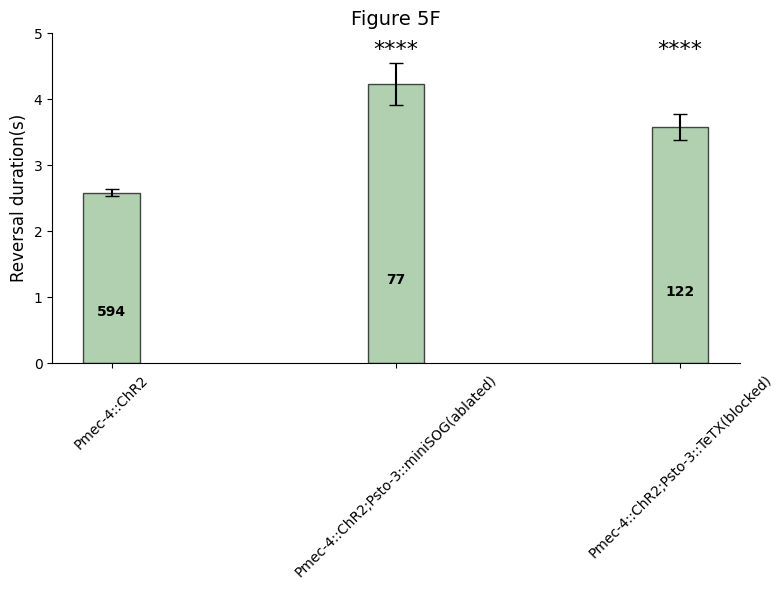

In [11]:
##绘制图形
#  2. 绘制条形图
plt.figure(figsize=(8, 6))

# 设置条形图颜色
colors = ['darkseagreen', 'darkseagreen', 'darkseagreen']
# 条形图的 X 轴位置
x_pos = np.arange(len(labels))


# 绘制条形图，并传入计算好的误差
plt.bar(x_pos, reversal_length, yerr=errors, capsize=5, color=colors, alpha=0.7, edgecolor='black',width=0.2)

# 添加文本标签 (在条形图内部显示 n)
# 从之前提取的数据中获取 n
n = [control_data['n'], ablated_data['n'], blocked_data['n']]

for i in range(len(labels)):
    # 将数字转为整数再格式化
    plt.text(x_pos[i], reversal_length[i] * 0.3, f'{int(n[i])}',
             ha='center', va='center', color='black', fontsize=10, fontweight='bold')

def add_significance_bracket(x1, x2, y_start, text):
    """辅助函数，用于绘制显著性标记线和文本"""
    # line_y = y_start + 0.03 # 标记线的高度，比y_start稍高
    text_y = y_start + 0.03  # 星号文本的高度
    # # 绘制水平线
    # plt.plot([x1, x1, x2, x2], [y_start, line_y, line_y, y_start], lw=1.0, c='black')
    # # 添加星号文本
    plt.text(x2, text_y, text, ha='center', va='bottom', fontsize=16)

# a) 比较 Control (x=0) vs Mutant (x=1)
p_val_ablated = ablated_data.get('multi', 1.0) # 使用 .get 防止 multi 列不存在时报错
if pd.notna(p_val_ablated) and p_val_ablated < 0.0001:
    # 找到这两根柱子误差棒的最高点
    y_max = max(reversal_length[0]+upper_limits[0], reversal_length[1]+upper_limits[1])
    add_significance_bracket(x_pos[0], x_pos[1], y_max + 0.02, '****')

# b) 比较 Mutant (x=1) vs Rescue (x=2)
p_val_blocked = blocked_data.get('multi', 1.0)
if pd.notna(p_val_blocked) and p_val_blocked < 0.0001:
    # 找到这两根柱子误差棒的最高点
    y_max = max(reversal_length[1] + upper_limits[1], reversal_length[2] + upper_limits[2])
    # 注意：为了避免标记线重叠，第二条线需要画得更高一点
    add_significance_bracket(x_pos[1], x_pos[2], y_max + 0.02, '****')

#  美化图表
plt.ylabel('Reversal duration(s)', fontsize=12)
plt.xticks(x_pos, labels, fontsize=10, rotation=45) # X 轴标签
plt.ylim(0, 5) # Y 轴范围，留出上方空间给星号
plt.title('Figure 5F', fontsize=14)
plt.grid(False) # 关闭背景网格
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout(w_pad=0.1)# 调整布局
plt.show()
